In [1]:
import os
import numpy as np
from cmdstanpy import cmdstan_path, CmdStanModel

import arviz as az
import seaborn as sns
import matplotlib.pyplot as plt

from tensorflow_probability.substrates import numpy as tfp
tfd = tfp.distributions

In [2]:
import cmdstanpy
cmdstanpy.install_cmdstan()

Installing CmdStan version: 2.31.0
Install directory: /Users/andrea/.cmdstan
CmdStan version 2.31.0 already installed


True

In [3]:
import pandas as pd

source = "../ames iowa/full.csv"
df = pd.read_csv(source)
df = df.loc[:, ["price", "Overall.Qual", "Half.Bath", "Garage.Area", "Total.Bsmt.SF", "X1st.Flr.SF",
                "Yr.Sold", "Year.Built",  "Mas.Vnr.Area", "TotRms.AbvGrd", "Fireplaces",
                "Wood.Deck.SF", "Full.Bath"]]
df = df.assign(AgeOfHouse= (df.loc[:, "Yr.Sold"] - df.loc[:, "Year.Built"]))
df

,price,Overall.Qual,Half.Bath,Garage.Area,Total.Bsmt.SF,X1st.Flr.SF,Yr.Sold,Year.Built,Mas.Vnr.Area,TotRms.AbvGrd,Fireplaces,Wood.Deck.SF,Full.Bath,AgeOfHouse
0,215000,6,0,528.0,1080.0,1656,2010,1960,112.0,7,2,210,1,50
1,105000,5,0,730.0,882.0,896,2010,1961,0.0,5,0,140,1,49
2,172000,6,1,312.0,1329.0,1329,2010,1958,108.0,6,0,393,1,52
3,244000,7,1,522.0,2110.0,2110,2010,1968,0.0,8,2,0,2,42
4,189900,5,1,482.0,928.0,928,2010,1997,0.0,6,1,212,2,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,142500,6,0,588.0,1003.0,1003,2006,1984,0.0,6,0,120,1,22
2926,131000,5,0,484.0,864.0,902,2006,1983,0.0,5,0,164,1,23
2927,132000,5,0,0.0,912.0,970,2006,1992,0.0,6,0,80,1,14
2928,170000,5,0,418.0,1389.0,1389,2006,1974,0.0,6,1,240,1,32


In [4]:
df = df.dropna()

In [5]:
stan_model = CmdStanModel(stan_file="./ssvs-bsts.stan")

12:48:41 - cmdstanpy - INFO - compiling stan file /Users/andrea/Library/CloudStorage/OneDrive-Personal/Documenti/University/Note e file corsi/Bayesian Statistics/progetto/SSVS-BSTS Analysis/ssvs-bsts.stan to exe file /Users/andrea/Library/CloudStorage/OneDrive-Personal/Documenti/University/Note e file corsi/Bayesian Statistics/progetto/SSVS-BSTS Analysis/ssvs-bsts
INFO:cmdstanpy:compiling stan file /Users/andrea/Library/CloudStorage/OneDrive-Personal/Documenti/University/Note e file corsi/Bayesian Statistics/progetto/SSVS-BSTS Analysis/ssvs-bsts.stan to exe file /Users/andrea/Library/CloudStorage/OneDrive-Personal/Documenti/University/Note e file corsi/Bayesian Statistics/progetto/SSVS-BSTS Analysis/ssvs-bsts
DEBUG:cmdstanpy:cmd: make /tmp/tmpe48n5y05/tmphfy9nouy
cwd: /Users/andrea/.cmdstan/cmdstan-2.31.0
DEBUG:cmdstanpy:Console output:

--- Translating Stan model to C++ code ---
bin/stanc  --o=/tmp/tmpe48n5y05/tmphfy9nouy.hpp /tmp/tmpe48n5y05/tmphfy9nouy.stan
Warning in '/tmp/tmpe48n5

In [6]:
features = df.loc[:, ["Overall.Qual", "Garage.Area", "Total.Bsmt.SF", "X1st.Flr.SF",
                "AgeOfHouse",  "Mas.Vnr.Area", "TotRms.AbvGrd", "Fireplaces",
                "Wood.Deck.SF", "Full.Bath"]]
data = {
    "N": df.shape[0],
    "p": features.shape[1],
    "Y": df.loc[:, "price"],
    "X": features,
    "year": df.loc[:, "Yr.Sold"],
    "tau_ss": 0.1,
    "c_ss": 100
}

stan_fit = stan_model.sample(data=data, chains=6, 
                             parallel_chains=6, 
                             iter_warmup=2000, iter_sampling=10000, adapt_delta=0.95)

cmdstanpy_data = az.from_cmdstanpy(stan_fit)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpoo2dltwv/r5g4xjvo.json
DEBUG:cmdstanpy:cmd: /Users/andrea/Library/CloudStorage/OneDrive-Personal/Documenti/University/Note e file corsi/Bayesian Statistics/progetto/SSVS-BSTS Analysis/ssvs-bsts info
cwd: None
12:48:52 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

chain 5 |          | 00:00 Status

chain 6 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:idx 3
DEBUG:cmdstanpy:idx 4
DEBUG:cmdstanpy:CmdStan args: ['/Users/andrea/Library/CloudStorage/OneDrive-Personal/Documenti/University/Note e file corsi/Bayesian Statistics/progetto/SSVS-BSTS Analysis/ssvs-bsts', 'id=2', 'random', 'seed=78795', 'data', 'file=/tmp/tmpoo2dltwv/r5g4xjvo.json', 'output', 'file=/tmp/tmpoo2dltwv/ssvs-bsts5jx90b5p/ssvs-bsts-20221217124852_2.csv', 'method=sample', 'num_samples=10000', 'num_warmup=2000', 'algorithm=hmc', 'adapt', 'engaged=1', 'delta=0.95']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:CmdStan args: ['/Users/andrea/Library/CloudStorage/OneDrive-Personal/Documenti/University/Note e file corsi/Bayesian Statistics/progetto/SSVS-BSTS Analysis/ssvs-bsts', 'id=1', 'random', 'seed=78795', 'data', 'file=/tmp/tmpoo2dltwv/r5g4xjvo.json', 'output', 'file=/tmp/tmpoo2dltwv/ssvs-bsts5jx90b5p/ssvs-bsts-2022121712485

13:24:13 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=6, chain_ids=[1, 2, 3, 4, 5, 6], num_processes=6
 cmd (chain 1):
	['/Users/andrea/Library/CloudStorage/OneDrive-Personal/Documenti/University/Note e file corsi/Bayesian Statistics/progetto/SSVS-BSTS Analysis/ssvs-bsts', 'id=1', 'random', 'seed=78795', 'data', 'file=/tmp/tmpoo2dltwv/r5g4xjvo.json', 'output', 'file=/tmp/tmpoo2dltwv/ssvs-bsts5jx90b5p/ssvs-bsts-20221217124852_1.csv', 'method=sample', 'num_samples=10000', 'num_warmup=2000', 'algorithm=hmc', 'adapt', 'engaged=1', 'delta=0.95']
 retcodes=[0, 0, 0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpoo2dltwv/ssvs-bsts5jx90b5p/ssvs-bsts-20221217124852_1.csv
 console_msgs (if any):
	/tmp/tmpoo2dltwv/ssvs-bsts5jx90b5p/ssvs-bsts-20221217124852_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 10000
    num_warmup = 2000
    sav

13:24:13 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 39 divergent transitions (0.4%)
	Chain 1 had 216 iterations at max treedepth (2.2%)
	Chain 2 had 217 divergent transitions (2.2%)
	Chain 2 had 34 iterations at max treedepth (0.3%)
	Chain 3 had 79 divergent transitions (0.8%)
	Chain 3 had 6279 iterations at max treedepth (62.8%)
	Chain 4 had 44 divergent transitions (0.4%)
	Chain 4 had 127 iterations at max treedepth (1.3%)
	Chain 5 had 88 divergent transitions (0.9%)
	Chain 5 had 265 iterations at max treedepth (2.6%)
	Chain 6 had 59 divergent transitions (0.6%)
	Chain 6 had 191 iterations at max treedepth (1.9%)
	Use function "diagnose()" to see further information.
	Chain 1 had 39 divergent transitions (0.4%)
	Chain 1 had 216 iterations at max treedepth (2.2%)
	Chain 2 had 217 divergent transitions (2.2%)
	Chain 2 had 34 iterations at max treedepth (0.3%)
	Chain 3 had 79 divergent transitions (0.8%)
	Chain 3 had 6279 iterations at max treedepth (6

In [10]:
print(stan_fit.diagnose())

DEBUG:cmdstanpy:cmd: /Users/andrea/.cmdstan/cmdstan-2.31.0/bin/diagnose /tmp/tmpoo2dltwv/ssvs-bsts5jx90b5p/ssvs-bsts-20221217124852_1.csv /tmp/tmpoo2dltwv/ssvs-bsts5jx90b5p/ssvs-bsts-20221217124852_2.csv /tmp/tmpoo2dltwv/ssvs-bsts5jx90b5p/ssvs-bsts-20221217124852_3.csv /tmp/tmpoo2dltwv/ssvs-bsts5jx90b5p/ssvs-bsts-20221217124852_4.csv /tmp/tmpoo2dltwv/ssvs-bsts5jx90b5p/ssvs-bsts-20221217124852_5.csv /tmp/tmpoo2dltwv/ssvs-bsts5jx90b5p/ssvs-bsts-20221217124852_6.csv
cwd: None


Processing csv files: /tmp/tmpoo2dltwv/ssvs-bsts5jx90b5p/ssvs-bsts-20221217124852_1.csv, /tmp/tmpoo2dltwv/ssvs-bsts5jx90b5p/ssvs-bsts-20221217124852_2.csv, /tmp/tmpoo2dltwv/ssvs-bsts5jx90b5p/ssvs-bsts-20221217124852_3.csv, /tmp/tmpoo2dltwv/ssvs-bsts5jx90b5p/ssvs-bsts-20221217124852_4.csv, /tmp/tmpoo2dltwv/ssvs-bsts5jx90b5p/ssvs-bsts-20221217124852_5.csv, /tmp/tmpoo2dltwv/ssvs-bsts5jx90b5p/ssvs-bsts-20221217124852_6.csv

Checking sampler transitions treedepth.
7112 of 60000 (11.85%) transitions hit the maximum treedepth limit of 10, or 2^10 leapfrog steps.
Trajectories that are prematurely terminated due to this limit will result in slow exploration.
For optimal performance, increase this limit.

Checking sampler transitions for divergences.
526 of 60000 (0.88%) transitions ended with a divergence.
These divergent transitions indicate that HMC is not fully able to explore the posterior distribution.
Try increasing adapt delta closer to 1.
If this doesn't remove all divergences, try to r

In [11]:
stan_fit.summary()

DEBUG:cmdstanpy:cmd: /Users/andrea/.cmdstan/cmdstan-2.31.0/bin/stansummary --percentiles= 5,50,95 --sig_figs=6 --csv_filename=/tmp/tmpoo2dltwv/stansummary-ssvs-bsts-kkes36fz.csv /tmp/tmpoo2dltwv/ssvs-bsts5jx90b5p/ssvs-bsts-20221217124852_1.csv /tmp/tmpoo2dltwv/ssvs-bsts5jx90b5p/ssvs-bsts-20221217124852_2.csv /tmp/tmpoo2dltwv/ssvs-bsts5jx90b5p/ssvs-bsts-20221217124852_3.csv /tmp/tmpoo2dltwv/ssvs-bsts5jx90b5p/ssvs-bsts-20221217124852_4.csv /tmp/tmpoo2dltwv/ssvs-bsts5jx90b5p/ssvs-bsts-20221217124852_5.csv /tmp/tmpoo2dltwv/ssvs-bsts5jx90b5p/ssvs-bsts-20221217124852_6.csv
cwd: None


,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
lp__,-33079.500000,0.262637,8.279100,-33093.900000,-33079.100000,-33066.700000,993.69900,0.128505,1.008050
beta0,28216.400000,11.756000,3021.120000,23260.900000,28203.300000,33207.800000,66041.30000,8.540440,0.999955
beta[1],2.206290,0.101147,7.537410,-8.853840,0.044857,17.267400,5553.16000,0.718133,1.000950
beta[2],106.339000,0.016321,4.568760,98.810600,106.344000,113.847000,78365.10000,10.134100,0.999949
beta[3],42.996300,0.013164,3.230470,37.643300,43.015900,48.272500,60225.30000,7.788310,0.999982
beta[4],39.611300,0.015684,3.629700,33.691600,39.592800,45.630600,53560.70000,6.926440,0.999934
beta[5],-48.124100,0.034238,9.618480,-63.881600,-48.117300,-32.369900,78920.90000,10.206000,0.999981
beta[6],74.204000,0.018111,5.004540,65.969100,74.210800,82.436900,76354.80000,9.874170,1.000030
beta[7],1.615500,0.066373,7.475970,-10.247000,0.034044,16.250600,12686.80000,1.640650,1.000280
beta[8],0.535423,0.051299,7.029400,-11.621900,0.010705,13.880000,18776.70000,2.428200,1.000170


/Users/andrea/miniforge3/lib/python3.10/site-packages/arviz/plots/traceplot.py:215: UserWarning: rcParams['plot.max_subplots'] (20) is smaller than the number of variables to plot (28), generating only 20 plots
  warnings.warn(


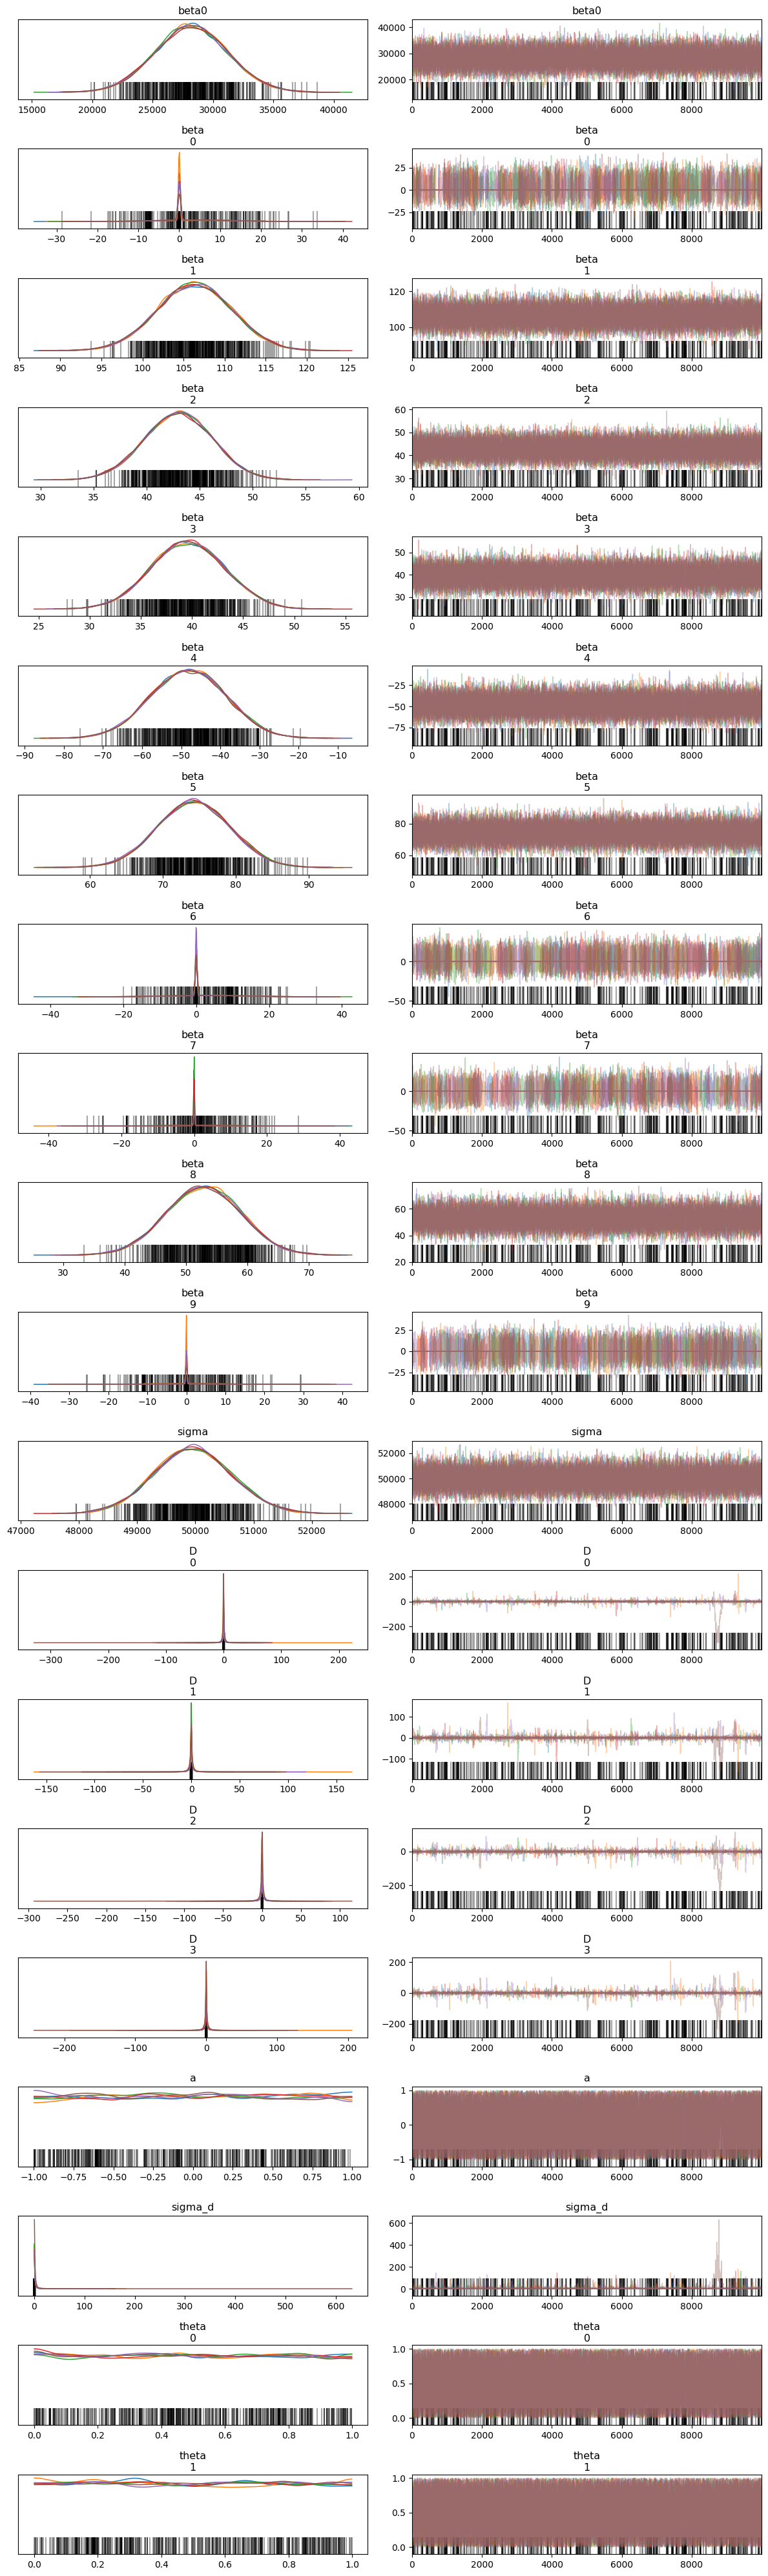

In [9]:
cmdstanpy_data = az.from_cmdstanpy(stan_fit)
az.plot_trace(cmdstanpy_data, compact=False)
plt.tight_layout()
# plt.savefig("ssvs-bsts.png")
plt.show()